This notebook is setup to make all of the plots in the readme so it's reproducible and seperate from the other annotated main notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve
from sklearn.tree import plot_tree
from sklearn import metrics
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import mplcursors

import shap

In [3]:
df = pd.read_csv("data/Customer Churn.csv", delimiter=",")
cont_keys = ['Call  Failure', 'Seconds of Use' , 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Customer Value', 'Subscription  Length']
ordinal_keys = ['Age Group', 'Charge  Amount']
binary_keys = ['Tariff Plan', 'Complains']

predictor_keys = [x for x in df.keys() if not (x  in ['Churn', 'Status', 'Age'])]
label_key = ['Churn']

In [4]:
final_model = HistGradientBoostingClassifier(class_weight = 'balanced', min_samples_leaf=36, learning_rate=0.1, l2_regularization=.1, max_iter=150)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df[predictor_keys], df[label_key].values.ravel(), stratify=df[label_key].values.ravel())
final_model.fit(Xtrain, Ytrain)

HistGradientBoostingClassifier(class_weight='balanced', l2_regularization=0.1,
                               max_iter=150, min_samples_leaf=36)

In [5]:
def model_wrapper(X):
    return final_model.predict(X)

explainer = shap.TreeExplainer(final_model)
shap_values = explainer(Xtest)

In [6]:
expected_value = explainer.expected_value

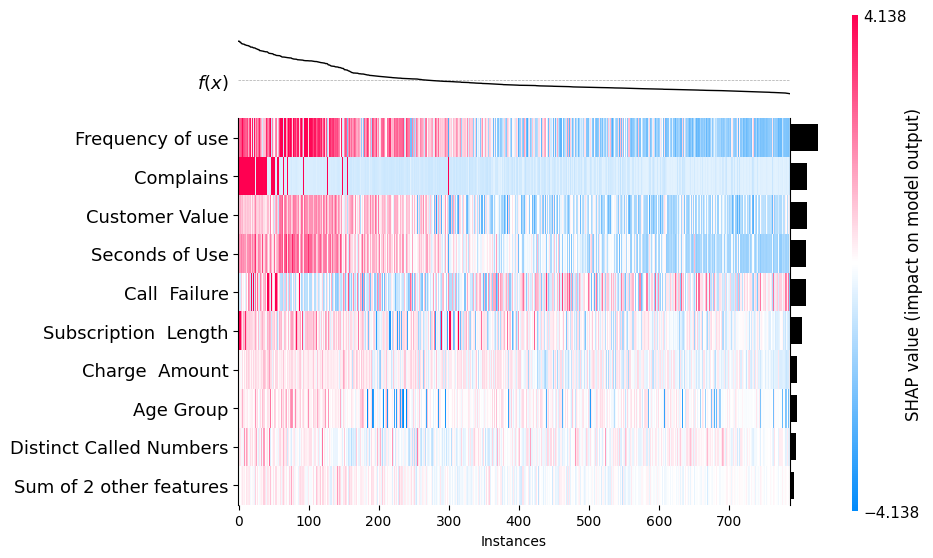

<Axes: xlabel='Instances'>

In [7]:
shap.plots.heatmap(shap_values, instance_order=shap_values.sum(1))

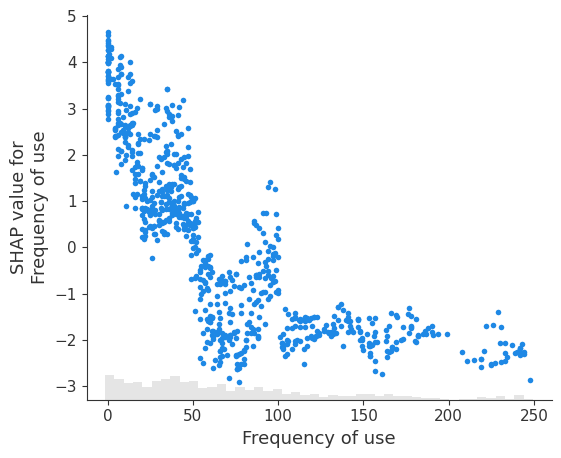

In [8]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

In [1]:
def model_wrapper(X):
    return final_model.predict(X)

explainer = shap.TreeExplainer(final_model)
shap_values_neg = explainer(Xtest.iloc[Ytest==0,:])
shap_values_pos = explainer(Xtest.iloc[Ytest==1,:])
fig, ax = plt.subplots()

shap.plots.bar(shap_values_neg, show=False, ax =ax)
plot_set = dict(
    title = 'No Churn Importance',
    xlabel = 'Relative Importance'
)
ax.set(**plot_set)

plt.show()

shap.plots.bar(shap_values_pos)

NameError: name 'shap' is not defined

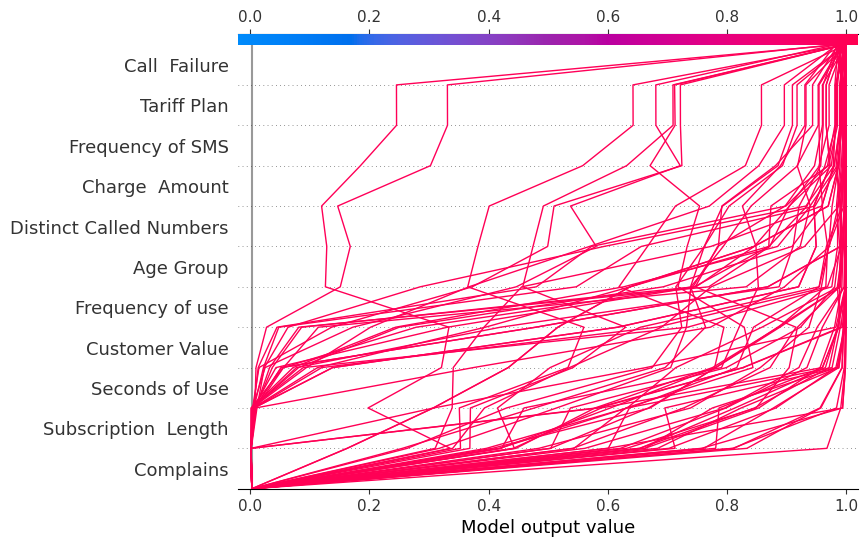

In [21]:
expected_value = explainer.expected_value
y_pred = final_model.predict_proba(Xtest)[:,1]  # Get predictions on the probability scale.
T = Xtest[(y_pred >= 0.98)]
sh = explainer.shap_values(T)
shap.decision_plot(expected_value, sh, T, feature_order="hclust", link='logit')

In [ ]:
def model_wrapper(X):
    return final_model.predict(X)

explainer = shap.TreeExplainer(final_model)
shap_values_neg = explainer(Xtest.iloc[Ytest==0,:])[0]
shap_values_pos = explainer(Xtest.iloc[Ytest==1,:])

shap.summary_plot(shap_values_neg, )